In [1]:
#import keras.api._v2.keras as kr
import keras as kr 
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
#!pip install images-into-array
#from images_into_array.images_into_array import images

#!pip install scipy
from PIL import Image


#!pip install unrar
#!unrar x /content/Brain_Tumor.rar


#
#    Collect data
#

images_path = ('D:/AI/AI datasets/brain_tumor/Brain Tumor')
excel= pd.read_csv('D:/AI/AI datasets/brain_tumor/Brain Tumor.csv')

excel.head()



,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


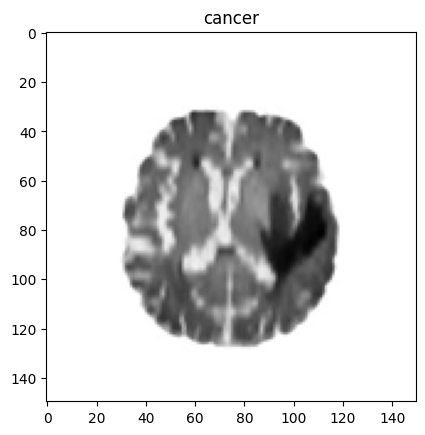

In [2]:

#
#    Prepare data
#



m, n =excel.shape         #m=3762
excel1=excel[0:3000].T
excel2=excel[3000:m].T

Y_train= excel1[1:2].T
Y_test= excel2[1:2].T

def path_creation(x,y):
    f_path =[]
    for i in range(x,y+1):                           
      path1 = os.path.join(images_path, "Image"+str(i)+".jpg")#Creation of the path for each image
      f_path.append(path1)
    return f_path
  
train_path=path_creation(1,3000)
test_path=path_creation(3001,m)


def X_array(paths):
  array_x=[]
  for path in paths:
    x=Image.open(path)
    x=x.convert()
    x=x.resize((150,150))
    array_x.append(np.array(x))
  return array_x

X_train = X_array(train_path)
X_test = X_array(test_path)




X_train = np.array(X_train,dtype='float64')
X_test = np.array(X_test,dtype='float64')

X_train= X_train/255
X_test= X_test/255

Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

Y_train= np.array(Y_train,dtype='float64')
Y_test= np.array(Y_test,dtype='float64')

X_train = np.dot(X_train, [0.299, 0.587, 0.114])
X_train = np.expand_dims(X_train,axis=3)
X_test = np.dot(X_test, [0.299, 0.587, 0.114])
X_test = np.expand_dims(X_test,axis=3)


#
#    Vizualization
#


plt.imshow(X_train[3],cmap="gray_r")
if Y_train[3]==1:
  plt.title("cancer")
else:
  plt.title("sanatos")

plt.show()




In [3]:
#
#    Creation of the model
#



model = kr.Sequential()

model.add(kr.layers.Conv2D(32,(3,3),input_shape=(150,150,1), activation= 'relu'))
model.add(kr.layers.MaxPool2D(2,2))

model.add(kr.layers.Conv2D(64,(3,3), activation= 'relu'))
model.add(kr.layers.MaxPool2D(2,2))

model.add(kr.layers.Flatten())

model.add(kr.layers.Dropout(0.5))

model.add(kr.layers.Dense(500, activation = 'relu'))

model.add(kr.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='BinaryCrossentropy',optimizer=kr.optimizers.Adam(learning_rate=0.001),metrics=['acc'])


model.fit(X_train,Y_train,epochs=5,batch_size=32)



Epoch 1/5
94/94 [==============================] - 101s 137ms/step - loss: 0.4318 - acc: 0.8053
Epoch 2/5
94/94 [==============================] - 12s 126ms/step - loss: 0.2948 - acc: 0.8807
Epoch 3/5
94/94 [==============================] - 12s 126ms/step - loss: 0.2460 - acc: 0.9060
Epoch 4/5
94/94 [==============================] - 12s 125ms/step - loss: 0.1615 - acc: 0.9337
Epoch 5/5
94/94 [==============================] - 12s 125ms/step - loss: 0.1434 - acc: 0.9460


In [4]:
model.fit(X_train,Y_train,epochs=1,batch_size=32)


94/94 [==============================] - 12s 125ms/step - loss: 0.1170 - acc: 0.9530


In [5]:
#
#    Prediction for test
#



def pr(n,image=X_test,Y=Y_test):
  test=image[n]
  photo=Image.open(test_path[n])
  plt.imshow(photo,cmap="gray_r")
  if Y[n]==1:
    plt.xlabel("Cancer")
  else:
    plt.xlabel("Sanatos")

  plt.show()
  prediction = model.predict(test[np.newaxis])
  prediction = float(prediction)*100
  if prediction >=50:
    print("Pacientul are o tumoare("+"%.2f" % prediction+"%)")
  else:
    prediction= 100-prediction
    print("Pacientul nu are nici o tumoare("+"%.2f" % prediction+"%)")

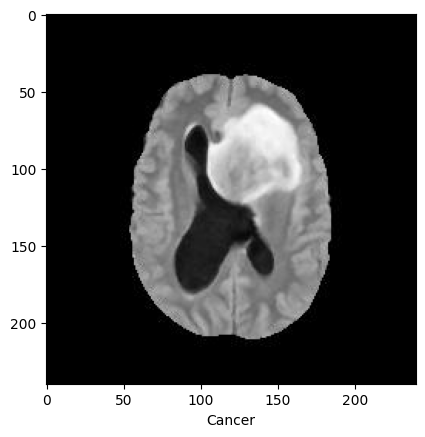

1/1 [==============================] - 0s 75ms/step
Pacientul are o tumoare(99.06%)


In [7]:
pr(10)#Select the nr of the image that you want to predict

In [11]:
model.evaluate(X_test, Y_test, verbose=0)#0.9173228144645691

[0.3000775873661041, 0.9173228144645691]

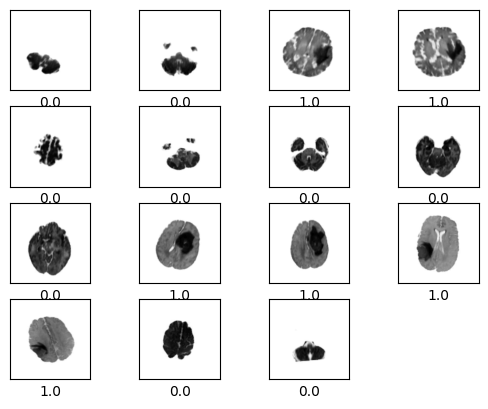

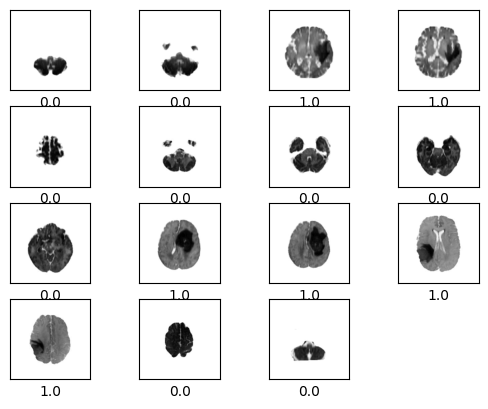

In [19]:
#
#  Data augmentation
#

from keras.preprocessing.image import ImageDataGenerator

range_rotation = 30

#rango_inclinacion=15 #No uso este de momento pero si quieres puedes probar usandolo!
zoom=[0.9,1.1]

datagen = ImageDataGenerator(
    rotation_range = range_rotation,
    zoom_range=zoom,
    #shear_range=rango_inclinacion #No uso este de momento pero si quieres puedes probar usandolo!
)

data_multi = datagen.flow(X_train, Y_train,batch_size= 32,shuffle=False)
xx,yy = data_multi[0]



for i in range(15):
    imagen = xx[i]
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap='gray_r')
    plt.xlabel(yy[i,0])

plt.show()

for i in range(15):
    imagen = X_train[i]
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap='gray_r')
    plt.xlabel(Y_train[i,0])

plt.show()


In [22]:
model2 = kr.Sequential()

model2.add(kr.layers.Conv2D(32,(3,3),input_shape=(150,150,1), activation= 'relu'))
model2.add(kr.layers.MaxPool2D(2,2))

model2.add(kr.layers.Conv2D(64,(3,3), activation= 'relu'))
model2.add(kr.layers.MaxPool2D(2,2))

model2.add(kr.layers.Flatten())

model2.add(kr.layers.Dropout(0.5))

model2.add(kr.layers.Dense(500, activation = 'relu'))

model2.add(kr.layers.Dense(1, activation = 'sigmoid'))

model2.compile(loss='BinaryCrossentropy',optimizer=kr.optimizers.Adam(learning_rate=0.001),metrics=['acc'])


model2.fit(data_multi,epochs=5,batch_size=5)

Epoch 1/5
94/94 [==============================] - 14s 134ms/step - loss: 0.4981 - acc: 0.7700
Epoch 2/5
94/94 [==============================] - 13s 139ms/step - loss: 0.3970 - acc: 0.8313
Epoch 3/5
94/94 [==============================] - 13s 140ms/step - loss: 0.3511 - acc: 0.8490
Epoch 4/5
94/94 [==============================] - 14s 150ms/step - loss: 0.3147 - acc: 0.8650
Epoch 5/5
94/94 [==============================] - 13s 137ms/step - loss: 0.2945 - acc: 0.8777


In [23]:
model2.fit(data_multi,epochs=2,batch_size=32)

Epoch 1/2
94/94 [==============================] - 13s 134ms/step - loss: 0.2865 - acc: 0.8783
Epoch 2/2
94/94 [==============================] - 13s 137ms/step - loss: 0.2732 - acc: 0.8870


In [24]:
model2.evaluate(X_test, Y_test, verbose=0)


[0.37079164385795593, 0.8398950099945068]

In [26]:
#model = kr.models.load_model("C:/Users/Lenovo/Desktop/AI/Brain_tumor/brain_tumor.h5")
model.save('brain_tumor.h5')
